# 1) Linear Regression Interactions and Polynomial Terms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
sales = advert['Sales']
advert = advert.drop('Sales', axis=1)

In [4]:
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
poly_int_data = poly.fit_transform(advert)
poly_int_data_cols = poly.get_feature_names_out(advert.columns)
poly_int = pd.DataFrame(data=poly_int_data, columns=poly_int_data_cols)
poly_int.columns = poly_int.columns.str.replace(' ', '*')
poly_int.columns = poly_int.columns.str.replace('^', '') # otherwise patsy/smf will complain about '^' symbolizing an 'or' in the formula
poly_int['Sales'] = sales
poly_int

C:\Users\natha\AppData\Local\Temp\ipykernel_17428\2702776624.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  poly_int.columns = poly_int.columns.str.replace('^', '') # otherwise patsy/smf will complain about '^' symbolizing an 'or' in the formula


,TV,Radio,Newspaper,TV2,TV*Radio,TV*Newspaper,Radio2,Radio*Newspaper,Newspaper2,Sales
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,22.1
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,10.4
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,12.0
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,16.5
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,17.9
...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44,7.6
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61,14.0
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96,14.8
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44,25.5


In [5]:
# Fit a linear regression model to the polynomial interaction features
model = smf.ols('Sales ~ ' + "+".join(poly_int.columns.difference(['Sales'])), data=poly_int)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     306.2
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          4.97e-108
Time:                        21:29:52   Log-Likelihood:                -342.10
No. Observations:                 200   AIC:                             704.2
Df Residuals:                     190   BIC:                             737.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2886      0.529     

With the somewhat arbitrary p val of 0.05, the following features are significant:
- Radio^2
- TV
- TV * Radio
- TV^2 

# 2) Full Linear Regression Analysis

In [6]:
autompg = pd.read_csv('auto-mpg.csv')

In [7]:
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Step 2 
(should be 1)

In [8]:
autompg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
autompg['horsepower'] = pd.to_numeric(autompg['horsepower'], errors='coerce')

In [10]:
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [11]:
# models with missing horspowers
autompg[autompg.isna().any(axis=1)]['car name']

32               ford pinto
126           ford maverick
330    renault lecar deluxe
336      ford mustang cobra
354             renault 18i
374          amc concord dl
Name: car name, dtype: object

In [12]:
# replace missing horsepowers with avg horsepower for that car model
autompg.horsepower = autompg.groupby('car name', group_keys=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))

In [13]:
autompg[autompg.isna().any(axis=1)]['car name']

330    renault lecar deluxe
336      ford mustang cobra
354             renault 18i
374          amc concord dl
Name: car name, dtype: object

In [14]:
# above models are the only instance of that car model, therefore replace missing horsepower with dataset avg
autompg.horsepower = autompg.horsepower.fillna(autompg.horsepower.mean())

## Step 1
(should be 2)

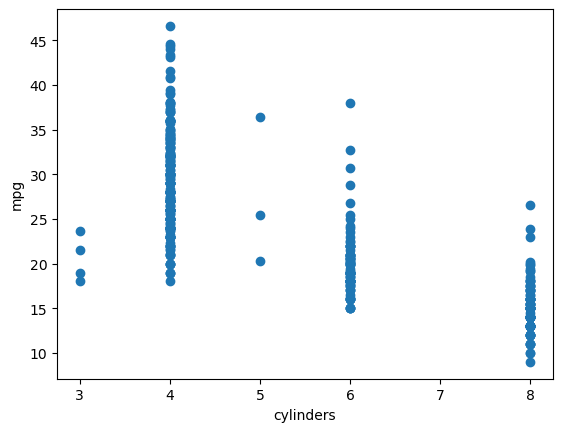

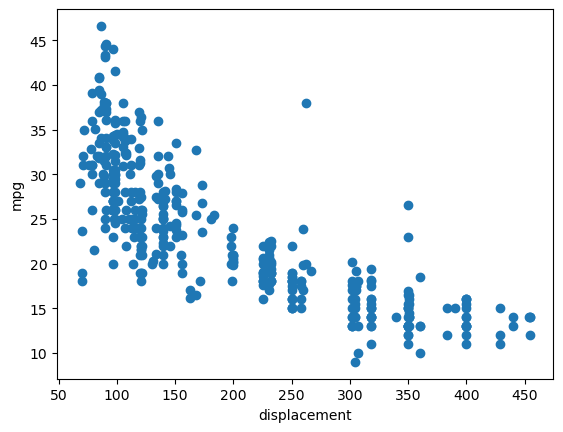

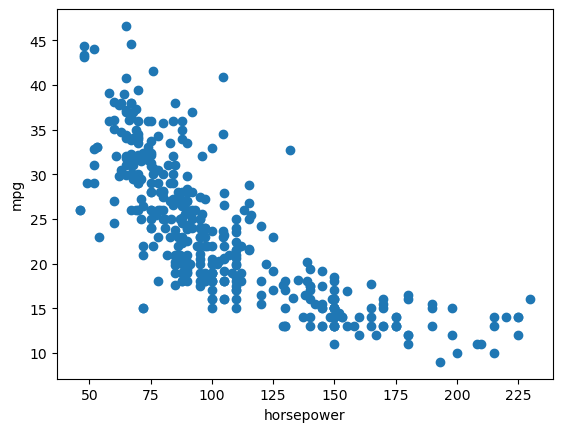

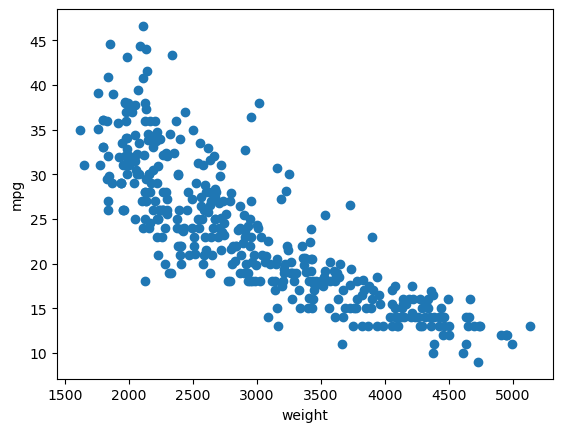

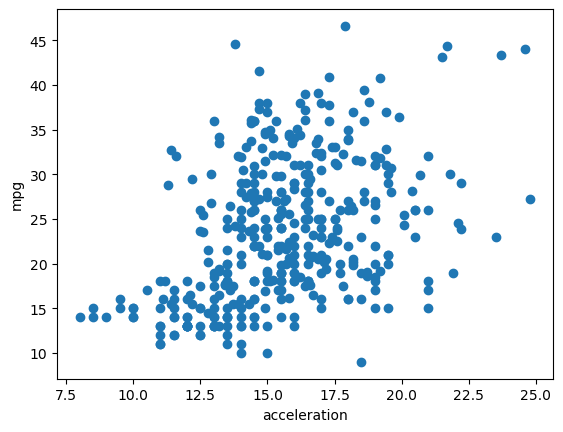

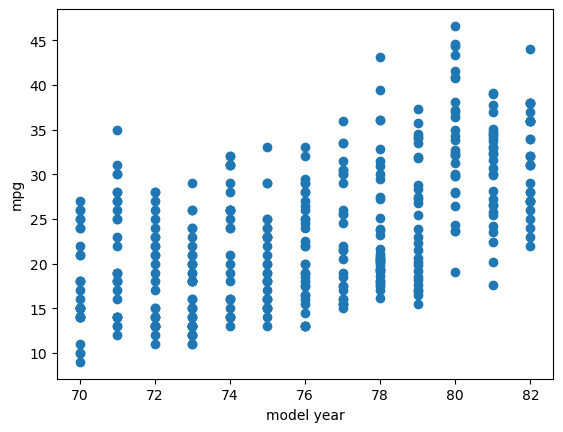

C:\Users\natha\AppData\Local\Temp\ipykernel_17428\2613892986.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  autompg.groupby('origin').mean()['mpg'].plot(kind='bar', ylabel='mpg')


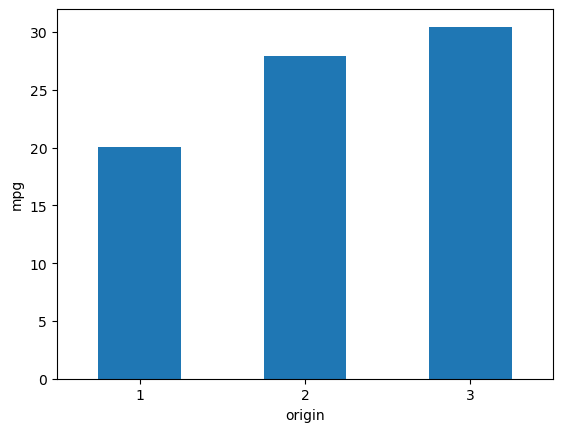

C:\Users\natha\AppData\Local\Temp\ipykernel_17428\2613892986.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  autompg.groupby('brand').mean()['mpg'].plot(kind='bar', ylabel='mpg')


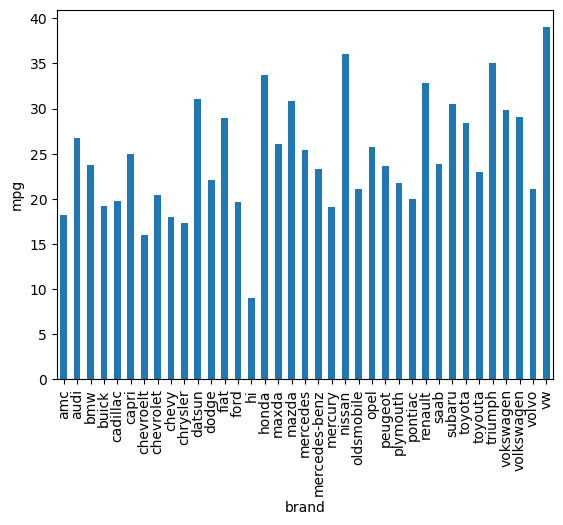

In [15]:
for col in autompg.columns:
    if col !='mpg':
        if col not in ['origin', 'car name']:
            plt.scatter(autompg[col], autompg['mpg'])
            plt.xlabel(col)
            plt.ylabel('mpg')
            plt.show()
        else:
            if col == 'origin':
                autompg.groupby('origin').mean()['mpg'].plot(kind='bar', ylabel='mpg')
                plt.xticks(rotation=0)
                plt.show()
            else:
                # plt.bar(autompg[col], autompg['mpg']) # way too noisy
                autompg['brand'] = autompg['car name'].str.split(' ').str[0]
                autompg.groupby('brand').mean()['mpg'].plot(kind='bar', ylabel='mpg')
                plt.show()
                autompg.drop('brand', axis=1, inplace=True)


## Step 3

In [16]:
cols_to_normalize = ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'model year', 'origin']

In [17]:
for col in cols_to_normalize:
    # autompg[col + '_normalized'] = (autompg[col] - autompg[col].mean()) / autompg[col].std()
    autompg[col + '_normalized'] = autompg[col]
    autompg[col + '_normalized'] -= autompg[col].min()
    autompg[col + '_normalized'] /= autompg[col].max()

In [18]:
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,displacement_normalized,horsepower_normalized,weight_normalized,acceleration_normalized,cylinders_normalized,model year_normalized,origin_normalized
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.525275,0.365217,0.367899,0.161290,0.625,0.000000,0.000000
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.619780,0.517391,0.404669,0.141129,0.625,0.000000,0.000000
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.549451,0.452174,0.354669,0.120968,0.625,0.000000,0.000000
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.518681,0.452174,0.354086,0.161290,0.625,0.000000,0.000000
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.514286,0.408696,0.357198,0.100806,0.625,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,0.158242,0.173913,0.228988,0.306452,0.125,0.146341,0.000000
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,0.063736,0.026087,0.100584,0.669355,0.125,0.146341,0.333333
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0.147253,0.165217,0.132685,0.145161,0.125,0.146341,0.000000
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,0.114286,0.143478,0.196887,0.427419,0.125,0.146341,0.000000


## Step 4

### Fit with all (normalized) variables

In [19]:
car_names = autompg['car name'] # too noisy of a signal, could 1hot encode but not worth the dimensionality, even with binning by brand
autompg.drop('car name', axis=1, inplace=True)
autompg.columns = autompg.columns.str.replace(' ', '_')

In [20]:
model1 = smf.ols('mpg ~ ' + "+".join([i for i in autompg.columns.difference(['mpg']) if 'normalized' in i])
, data=autompg)
model1 = model1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          2.28e-141
Time:                        21:29:53   Log-Likelihood:                -1040.4
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

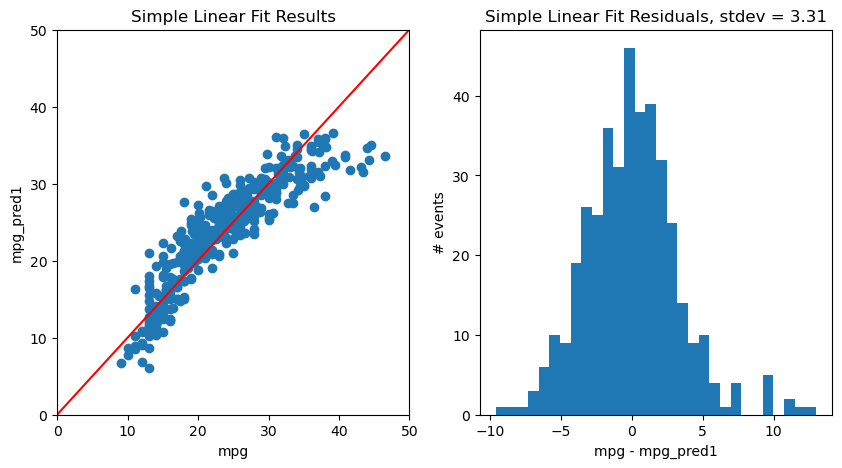

In [21]:
mpg_pred = model1.predict()
autompg['mpg_pred1'] = mpg_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(autompg['mpg'], autompg['mpg_pred1'])
plt.plot(np.linspace(0, 50, 2), np.linspace(0, 50, 2), color='red', label='mpg_pred1=mpg')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.ylabel('mpg_pred1')
plt.xlabel('mpg')
plt.title('Simple Linear Fit Results')

plt.subplot(122)
plt.hist(autompg['mpg'] - autompg['mpg_pred1'], bins=30)
plt.ylabel('# events')
plt.xlabel('mpg - mpg_pred1')
_=plt.title(f'Simple Linear Fit Residuals, stdev = {np.round((autompg["mpg"] - autompg["mpg_pred1"]).std(), 2)}')

## Step 5

### Fit with significant (normalized) variables


In [22]:
model2 = smf.ols('mpg ~ ' + "+".join(['displacement_normalized', 'model_year_normalized', 'origin_normalized', 'weight_normalized']), data=autompg)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        21:29:54   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

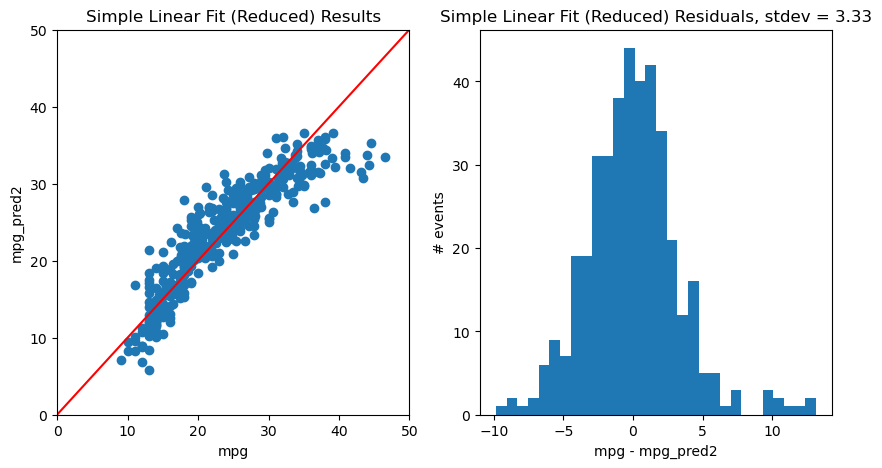

In [23]:
mpg_pred = model2.predict()
autompg['mpg_pred2'] = mpg_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(autompg['mpg'], autompg['mpg_pred2'])
plt.plot(np.linspace(0, 50, 2), np.linspace(0, 50, 2), color='red', label='mpg_pred2=mpg')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.ylabel('mpg_pred2')
plt.xlabel('mpg')
plt.title('Simple Linear Fit (Reduced) Results')

plt.subplot(122)
plt.hist(autompg['mpg'] - autompg['mpg_pred2'], bins=30)
plt.ylabel('# events')
plt.xlabel('mpg - mpg_pred2')
_=plt.title(f'Simple Linear Fit (Reduced) Residuals, stdev = {np.round((autompg["mpg"] - autompg["mpg_pred2"]).std(), 2)}')

Expected behavior, model gets slightly worse, but simpler as there's less variables

## Step 6

In [24]:
normalized_autompg = autompg[[col for col in autompg.columns if 'normalized' in col]]

poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
poly_int_data = poly.fit_transform(normalized_autompg)
poly_int_data_cols = poly.get_feature_names_out(normalized_autompg.columns)
poly_int = pd.DataFrame(data=poly_int_data, columns=poly_int_data_cols)
poly_int.columns = poly_int.columns.str.replace(' ', '*')
poly_int.columns = poly_int.columns.str.replace('^', '') # otherwise patsy/smf will complain about '^' symbolizing an 'or' in the formula
poly_int['mpg'] = autompg['mpg']
poly_int

C:\Users\natha\AppData\Local\Temp\ipykernel_17428\2147515964.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  poly_int.columns = poly_int.columns.str.replace('^', '') # otherwise patsy/smf will complain about '^' symbolizing an 'or' in the formula


,displacement_normalized,horsepower_normalized,weight_normalized,acceleration_normalized,cylinders_normalized,model_year_normalized,origin_normalized,displacement_normalized2,displacement_normalized*horsepower_normalized,displacement_normalized*weight_normalized,...,acceleration_normalized*cylinders_normalized,acceleration_normalized*model_year_normalized,acceleration_normalized*origin_normalized,cylinders_normalized2,cylinders_normalized*model_year_normalized,cylinders_normalized*origin_normalized,model_year_normalized2,model_year_normalized*origin_normalized,origin_normalized2,mpg
0,0.525275,0.365217,0.367899,0.161290,0.625,0.000000,0.000000,0.275914,0.191839,0.193248,...,0.100806,0.000000,0.000000,0.390625,0.000000,0.000000,0.000000,0.00000,0.000000,18.0
1,0.619780,0.517391,0.404669,0.141129,0.625,0.000000,0.000000,0.384128,0.320669,0.250806,...,0.088206,0.000000,0.000000,0.390625,0.000000,0.000000,0.000000,0.00000,0.000000,15.0
2,0.549451,0.452174,0.354669,0.120968,0.625,0.000000,0.000000,0.301896,0.248447,0.194873,...,0.075605,0.000000,0.000000,0.390625,0.000000,0.000000,0.000000,0.00000,0.000000,18.0
3,0.518681,0.452174,0.354086,0.161290,0.625,0.000000,0.000000,0.269030,0.234534,0.183658,...,0.100806,0.000000,0.000000,0.390625,0.000000,0.000000,0.000000,0.00000,0.000000,16.0
4,0.514286,0.408696,0.357198,0.100806,0.625,0.000000,0.000000,0.264490,0.210186,0.183702,...,0.063004,0.000000,0.000000,0.390625,0.000000,0.000000,0.000000,0.00000,0.000000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.158242,0.173913,0.228988,0.306452,0.125,0.146341,0.000000,0.025040,0.027520,0.036236,...,0.038306,0.044847,0.000000,0.015625,0.018293,0.000000,0.021416,0.00000,0.000000,27.0
394,0.063736,0.026087,0.100584,0.669355,0.125,0.146341,0.333333,0.004062,0.001663,0.006411,...,0.083669,0.097954,0.223118,0.015625,0.018293,0.041667,0.021416,0.04878,0.111111,44.0
395,0.147253,0.165217,0.132685,0.145161,0.125,0.146341,0.000000,0.021683,0.024329,0.019538,...,0.018145,0.021243,0.000000,0.015625,0.018293,0.000000,0.021416,0.00000,0.000000,32.0
396,0.114286,0.143478,0.196887,0.427419,0.125,0.146341,0.000000,0.013061,0.016398,0.022501,...,0.053427,0.062549,0.000000,0.015625,0.018293,0.000000,0.021416,0.00000,0.000000,28.0


## Step 7

In [25]:
model3 = smf.ols('mpg ~ ' + "+".join([i for i in poly_int.columns.difference(['mpg'])]), data=poly_int)
model3 = model3.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     88.16
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          5.01e-155
Time:                        21:29:54   Log-Likelihood:                -934.09
No. Observations:                 398   AIC:                             1940.
Df Residuals:                     362   BIC:                             2084.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

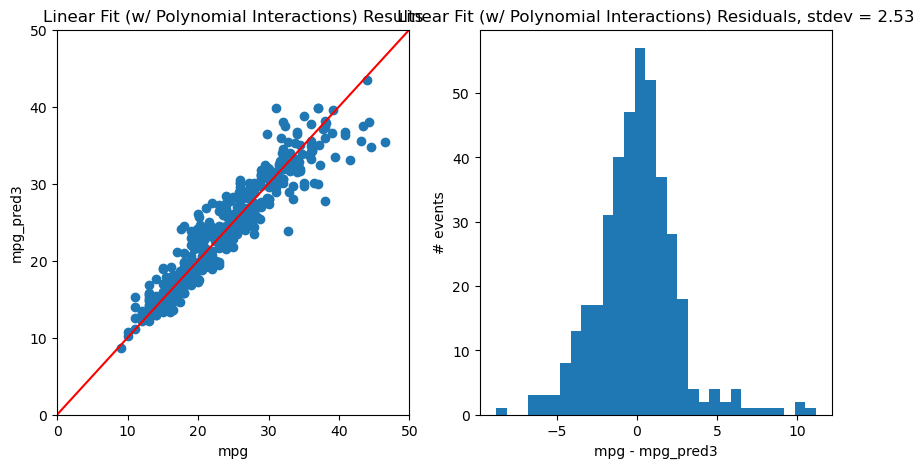

In [26]:
mpg_pred = model3.predict()
autompg['mpg_pred3'] = mpg_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(autompg['mpg'], autompg['mpg_pred3'])
plt.plot(np.linspace(0, 50, 2), np.linspace(0, 50, 2), color='red', label='mpg_pred3=mpg')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.ylabel('mpg_pred3')
plt.xlabel('mpg')
plt.title('Linear Fit (w/ Polynomial Interactions) Results')

plt.subplot(122)
plt.hist(autompg['mpg'] - autompg['mpg_pred3'], bins=30)
plt.ylabel('# events')
plt.xlabel('mpg - mpg_pred3')
_=plt.title(f'Linear Fit (w/ Polynomial Interactions) Residuals, stdev = {np.round((autompg["mpg"] - autompg["mpg_pred3"]).std(), 2)}')

In [27]:
sig_vars = model3.params.iloc[np.where(model3.pvalues < 0.05)].index.tolist() # previous model
sig_vars.remove('Intercept')
sig_vars = [sig_var.replace(':', '*') for sig_var in sig_vars]
sig_vars

['acceleration_normalized',
 'acceleration_normalized*model_year_normalized',
 'origin_normalized',
 'acceleration_normalized*origin_normalized',
 'displacement_normalized*model_year_normalized',
 'model_year_normalized*origin_normalized',
 'model_year_normalized2',
 'weight_normalized*model_year_normalized']

Big jump in residual error, down to 2.53 from 3.34 - thus we have a better model.

## Step 8

In [28]:
model4 = smf.ols('mpg ~ ' + "+".join(sig_vars), data=poly_int)
model4 = model4.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     223.4
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          8.73e-160
Time:                        21:29:55   Log-Likelihood:                -985.23
No. Observations:                 398   AIC:                             1994.
Df Residuals:                     386   BIC:                             2042.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

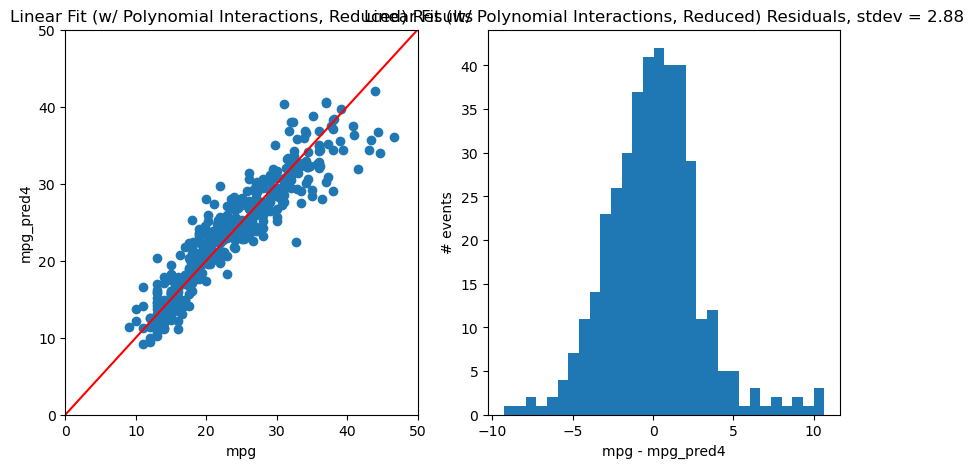

In [29]:
mpg_pred = model4.predict()
autompg['mpg_pred4'] = mpg_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(autompg['mpg'], autompg['mpg_pred4'])
plt.plot(np.linspace(0, 50, 2), np.linspace(0, 50, 2), color='red', label='mpg_pred4=mpg')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.ylabel('mpg_pred4')
plt.xlabel('mpg')
plt.title('Linear Fit (w/ Polynomial Interactions, Reduced) Results')

plt.subplot(122)
plt.hist(autompg['mpg'] - autompg['mpg_pred4'], bins=30)
plt.ylabel('# events')
plt.xlabel('mpg - mpg_pred4')
_=plt.title(f'Linear Fit (w/ Polynomial Interactions, Reduced) Residuals, stdev = {np.round((autompg["mpg"] - autompg["mpg_pred4"]).std(), 2)}')

Overall, a better fit with polynomial interactions than without (residual stdevs of 2.88 vs 3.34), but we see the same expected behavior where cutting down on model parameters degrades model performance (at the benefit of simplicity).